<a href="https://colab.research.google.com/github/wanjaperpetual/assignment/blob/main/_lstm_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error as mse



## GET DATA USING THE YAHOO FINACE API
**Imports yfinance:**

The yfinance library t enables you to download stock market data from Yahoo Finance.
:

**The variable ticker is set to** 'AAPL', which represents Apple Inc.'s stock symbol.

Downloads Historical Stock Data:
**The yf.download()** function is used to download historical stock price data for the specified ticker.

Parameters:
**start='2018-01-01':** The data download starts from January 1, 2018.

**end='2023-01-01': **The data download ends on January 1, 2023.

interval='1d': The data is downloaded at a daily interval (one row per day, including Open, High, Low, Close prices

In [ ]:
import yfinance as yf

# Fetch historical data for the last 5 years (to capture long-term trends)
ticker = 'AAPL'
stock_data = yf.download(ticker, start='2018-01-01', end='2023-01-01', interval='1d')


[*********************100%***********************]  1 of 1 completed


In [ ]:
AAPL_df = stock_data
AAPL_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.568924,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.561863,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.750263,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.214233,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.061146,82271200


In [ ]:
# Fetch historical stock data (Apple)
import yfinance as yf

ticker = 'AAPL'
stock_data = yf.download(ticker, start='2018-01-01', end='2023-01-01', interval='1d')

# Filter columns and set 'Date' as index
APPLE_df = stock_data[['Close']].copy()  # Use only 'Close' price
APPLE_df.index = stock_data.index  # Keep 'Date' as the index

# Display the first 5 rows
APPLE_df.head()


[*********************100%***********************]  1 of 1 completed


,Close
Date,
2018-01-02,43.064999
2018-01-03,43.057499
2018-01-04,43.257500
2018-01-05,43.750000
2018-01-08,43.587502


In [ ]:
APPLE_df.shape

(1259, 1)

In [ ]:
APPLE_df.loc['2022-01-01':'2022-12-31']

,Close
Date,
2022-01-03,182.009995
2022-01-04,179.699997
2022-01-05,174.919998
2022-01-06,172.000000
2022-01-07,172.169998
...,...
2022-12-23,131.860001
2022-12-27,130.029999
2022-12-28,126.040001


In [ ]:
print (APPLE_df.index.min())
print (APPLE_df.index.max())

2018-01-02 00:00:00
2022-12-30 00:00:00


In [ ]:
df=APPLE_df

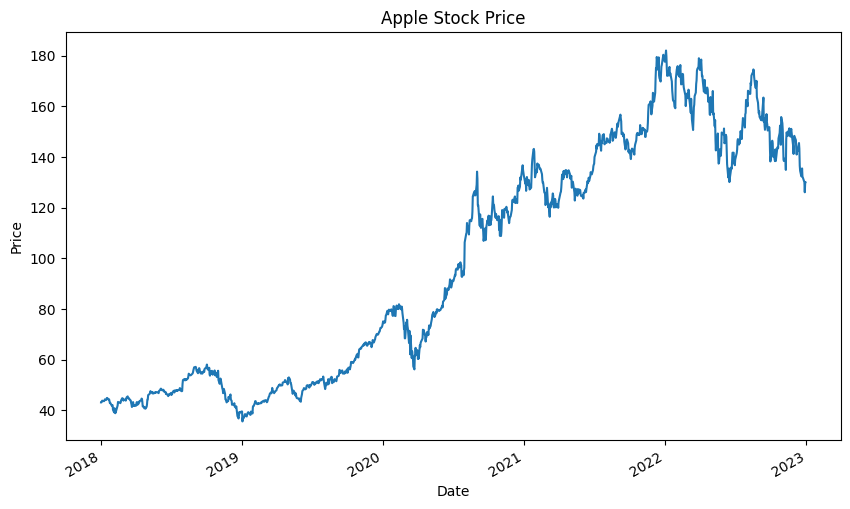

In [ ]:
plt.figure(figsize=(10, 6))
df.Close.plot()
plt.title('Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
prev_value= stock_data['Close'].iloc[:100]# train
prev_value

,Close
Date,
2018-01-02,43.064999
2018-01-03,43.057499
2018-01-04,43.257500
2018-01-05,43.750000
2018-01-08,43.587502
...,...
2018-05-18,46.577499
2018-05-21,46.907501
2018-05-22,46.790001


In [ ]:
stock_train= stock_data['Close'].iloc[100:]# train
stock_train

,Close
Date,
2018-05-25,47.145000
2018-05-29,46.974998
2018-05-30,46.875000
2018-05-31,46.717499
2018-06-01,47.560001
...,...
2022-12-23,131.860001
2022-12-27,130.029999
2022-12-28,126.040001


In [ ]:
def plot_pred(pred,title):
    plt.figure(figsize=(10, 6))
    plt.plot(prev_value, label='Train')
    plt.plot(pred, label='Predicted')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

USE AVERAGE
here we will use average  of previous value  and predict the forcast

In [ ]:

from sklearn.model_selection import train_test_split
stock_train, stock_test = train_test_split(stock_data['Close'], test_size=0.2, random_state=42)  # Example split
Y_av = pd.Series(np.repeat(stock_train.mean(), len(stock_test)), index=stock_test.index)
mse(stock_test, Y_av)

2117.691687302937

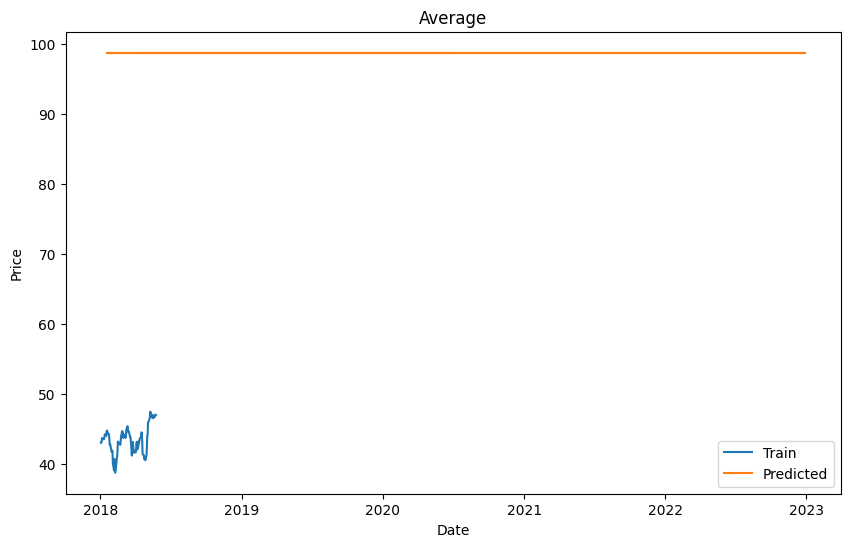

In [ ]:
plot_pred(Y_av,'Average')

#   Weighted mean
We  shall  give more weighted  to the data which are close to the last day training data while calculate  the mean .the last in the training set  wieght  of

In [ ]:
# Create weight array
weight = np.array(range(0, len(stock_train))) / len(stock_train)  # Normalized weights based on stock_train length

# Ensure stock_train is a numpy array (if it's a DataFrame or Series, convert it)
stock_train = np.array(stock_train)

# Apply weights to stock_train
weighted_train_data = np.multiply(weight, stock_train)

# Calculate weighted average
weighted_average = sum(weighted_train_data) / sum(weight)

# Generate a Series of the same length as stock_test with the weighted average as constant prediction
y_wa = pd.Series(np.repeat(weighted_average, len(stock_test)), index=stock_test.index)

# Mean Squared Error calculation between stock_test and weighted average
mse = ((stock_test - y_wa) ** 2).mean()

# Output the results
print(f"Weighted Average: {weighted_average}")
print(f"Mean Squared Error (MSE): {mse}")

Weighted Average: 99.76356947077915
Mean Squared Error (MSE): 2125.4144916807068


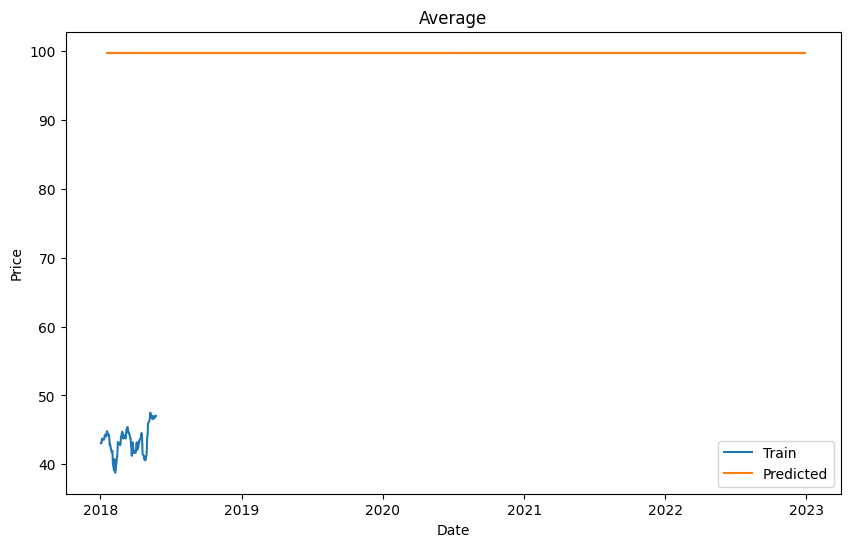

In [ ]:
plot_pred(y_wa,'Average')

 our time series analysis for stock price predictions, we will utilize historical stock prices to forecast future values.

  Specifically, we will predict the value of a stock price on a given day based on the stock prices from the previous 80 days.
  
   In our dataset, we will exclude the first 8 days as they do not provide the required historical data for prediction.

In [ ]:
# Assuming stock_price is a Pandas DataFrame or Series that holds the stock prices

# Add this line to define stock_price with some sample data
# Replace this with your actual stock price data
import pandas as pd
stock_price = pd.Series(range(300))

y_train = stock_price[80:180]  # Use stock prices from index 80 to 180 for training
y_test = stock_price[180:248]  # Use stock prices from index 180 to 248 for testing

In [ ]:
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

y_train: (100,)
y_test: (68,)


the are  100 days  in training and  68days in testing  .we will consturst the  features ,that is last the  80 days stocks  for each date in ytrain,ytest

In [ ]:

# Create X_train: 100 rows (training samples), with the last 80 days of stock prices as features
X_train = pd.DataFrame(
    [list(stock_price[i:i+80]) for i in range(100)],
    columns=range(80, 0, -1),  # Column names representing the lag days
    index=y_train.index  # The index will be the same as y_train
)

# Create X_test: 68 rows (testing samples), with the last 80 days of stock prices as features
X_test = pd.DataFrame(
    [list(stock_price[i:i+80]) for i in range(100, 168)],
    columns=range(80, 0, -1),  # Same column names for lag days
    index=y_test.index  # The index will be the same as y_test
)

# Display X_train
print(X_train)


     80   79   78   77   76   75   74   73   72   71  ...   10   9    8    7   \
80    0    1    2    3    4    5    6    7    8    9  ...   70   71   72   73   
81    1    2    3    4    5    6    7    8    9   10  ...   71   72   73   74   
82    2    3    4    5    6    7    8    9   10   11  ...   72   73   74   75   
83    3    4    5    6    7    8    9   10   11   12  ...   73   74   75   76   
84    4    5    6    7    8    9   10   11   12   13  ...   74   75   76   77   
..   ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
175  95   96   97   98   99  100  101  102  103  104  ...  165  166  167  168   
176  96   97   98   99  100  101  102  103  104  105  ...  166  167  168  169   
177  97   98   99  100  101  102  103  104  105  106  ...  167  168  169  170   
178  98   99  100  101  102  103  104  105  106  107  ...  168  169  170  171   
179  99  100  101  102  103  104  105  106  107  108  ...  169  170  171  172   

      6    5    4    3    2

The image you provided contains an explanation of the X_train and X_test DataFrames created earlier for the stock price prediction project.

Here’s a brief summary:

X_train: A collection of 100 dates as the index, where each row contains the stock prices for the previous 80 days as features.

X_test: A similar collection, but with 68 dates as the index

and stock prices of the previous 80 days as features.




# Moving average

In [ ]:
from sklearn.metrics import mean_squared_error

y_ma = X_test.mean(axis=1)
# Use mean_squared_error function from sklearn instead of the variable mse
mse_value = mean_squared_error(y_test, y_ma)
print(mse_value)

1640.25


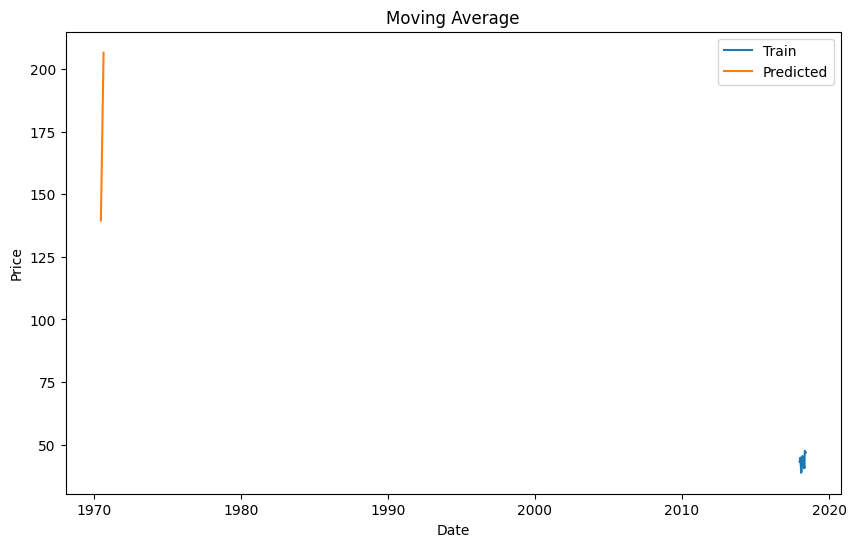

In [ ]:
plot_pred(y_ma,'Moving Average')

# building the  LSTM model

from our observation diffrent methodology traditional methods cannot be used due to the volarity of the data this data type is called time series

Time series data is a sequence of data points collected or recorded at specific time intervals. This type of data is commonly used in various fields, such as finance, economics, environmental science, and many others, to analyze trends over time, make forecasts, and identify patterns

in order to create a model that can retain and accept the diffrent variant or features of a stock we use neural networks

# A neural network

Definition: A neural network consists of interconnected groups of artificial neurons (nodes), which process data and are capable of learning from examples.

Structure:

Input Layer: The first layer of the neural network that receives input data.

Hidden Layers: Layers between the input and output layers where computations are performed. A neural network can have one or more hidden layers.

Output Layer: The final layer that produces the output of the network.

#RNNs and LSTMs

RNNs and LSTMs are powerful models for processing sequential data. RNNs capture dependencies in sequences by maintaining hidden states, while LSTMs address the vanishing gradient problem by using gates to control the flow of information.

These networks can be effectively used for tasks like stock price prediction, where past values inform future outcomes.

Guide to Implement RNN and LSTM

*   Install Required Libraries
Make sure you have the necessary libraries installed, such as TensorFlow and Keras
*    Load and Preprocess Data
Load your dataset and preprocess it. This typically involves normalizing the data and splitting it into training and test sets.


*   Create Training Sequences
Transform your time series data into sequences that the model can learn from.
*   Build the RNN/LSTM Model
*   Choose the architecture of your RNN or LSTM
*  COMPILE AND TRAIN THE MODEL
*  Make Prediction and train the model







